<a href="https://colab.research.google.com/github/s-o-w-m-y-a-a/IIITH-AIML-labs/blob/main/lab_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Change the coefficients array and try a different polynomial instead of our  x2**

Implementation of 3rd degree polynomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

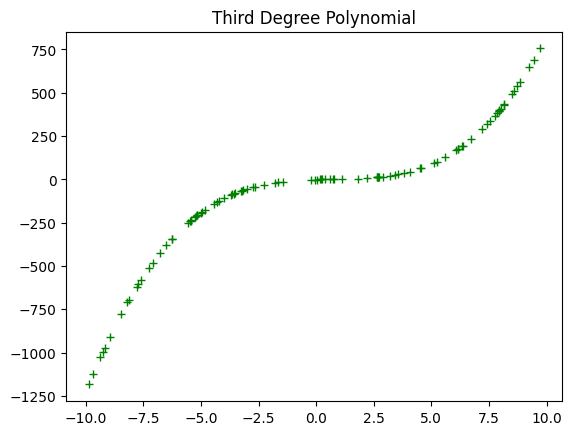

In [ ]:

coeffs = [1, -2, 3, -1]

# Experiment with degree 3 polynomial
def eval_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial, given a specific x value.
    """

    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y


hundred_xs = np.random.uniform(-10, 10, 100)


xs = []
ys = []
for x in hundred_xs:
    y = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)


plt.plot(xs, ys, 'g+')
plt.title('Third Degree Polynomial')
plt.show()

**2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

In [ ]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

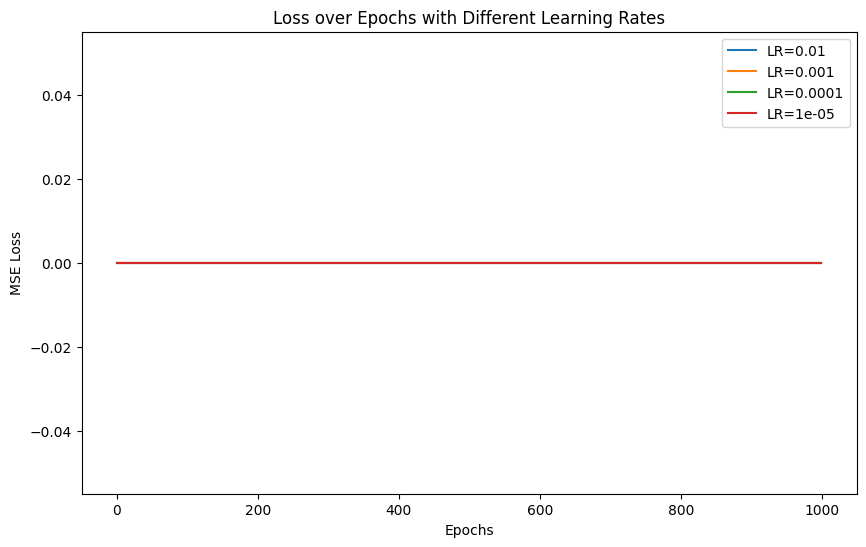

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.
    """
    squared_errors = [(y_true - y_pred) ** 2 for y_true, y_pred in zip(ys, y_bar)]
    mse = sum(squared_errors) / len(ys)
    return mse


def gradient_descent_with_lr(epochs, lr):

    rand_coeffs = [random.randrange(-10, 10) for _ in range(3)]

    hundred_xs = np.random.uniform(-10, 10, 100)

    ys = [eval_2nd_degree(rand_coeffs, x) for x in hundred_xs]

    losses = []
    coeffs_over_epochs = []

    for i in range(epochs):
        calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)
        rand_coeffs = [rand_coeffs[j] - lr * calc_grad[j] for j in range(3)]

        new_y_bar = [eval_2nd_degree(rand_coeffs, x) for x in hundred_xs]
        updated_model_loss = loss_mse(ys, new_y_bar)

        losses.append(updated_model_loss)
        coeffs_over_epochs.append(rand_coeffs)

    return losses

learning_rates = [0.01, 0.001, 0.0001, 0.00001]
epochs = 1000  # Number of iterations

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    losses = gradient_descent_with_lr(epochs, lr)
    plt.plot(range(epochs), losses, label=f'LR={lr}')

plt.title('Loss over Epochs with Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


**3.Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?**

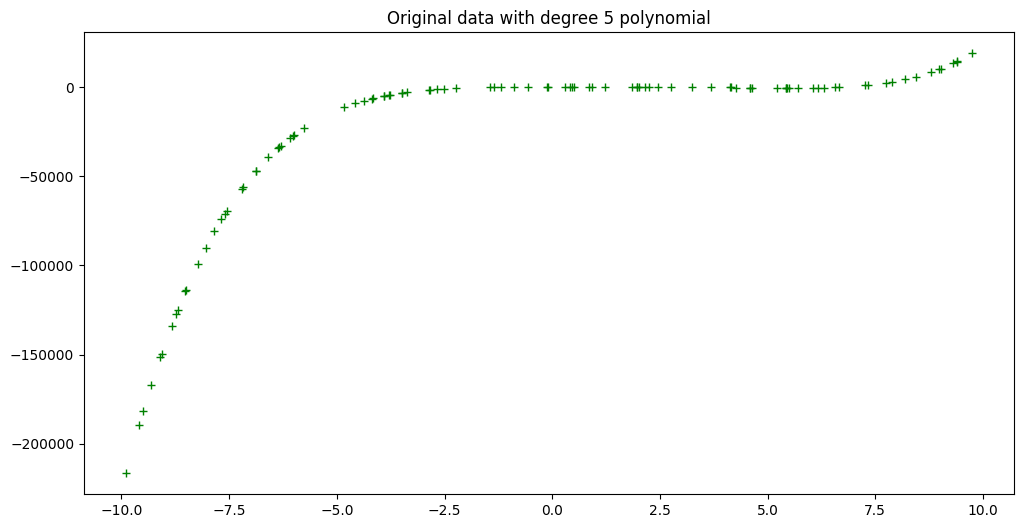

<ipython-input-23-8743527a0064>:25: RuntimeWarning: overflow encountered in double_scalars
  gradients[i] += (y_bar - y) * partial_coeff
<ipython-input-23-8743527a0064>:25: RuntimeWarning: invalid value encountered in double_scalars
  gradients[i] += (y_bar - y) * partial_coeff


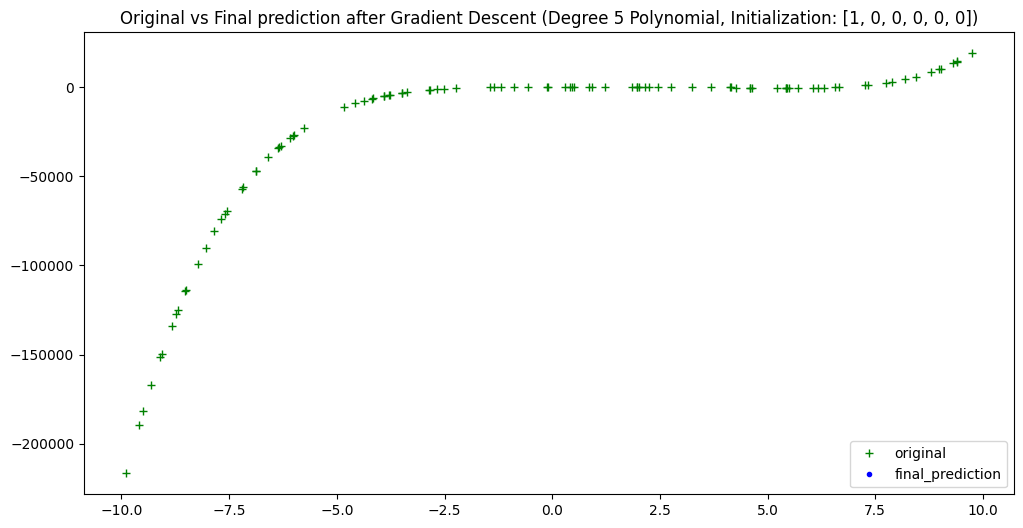

Final Coefficients predicted (Initialization: [1, 0, 0, 0, 0, 0]): [nan, nan, nan, nan, nan, nan]


<ipython-input-23-8743527a0064>:12: RuntimeWarning: invalid value encountered in double_scalars
  result += coeffs[i] * (x ** (len(coeffs) - 1 - i))


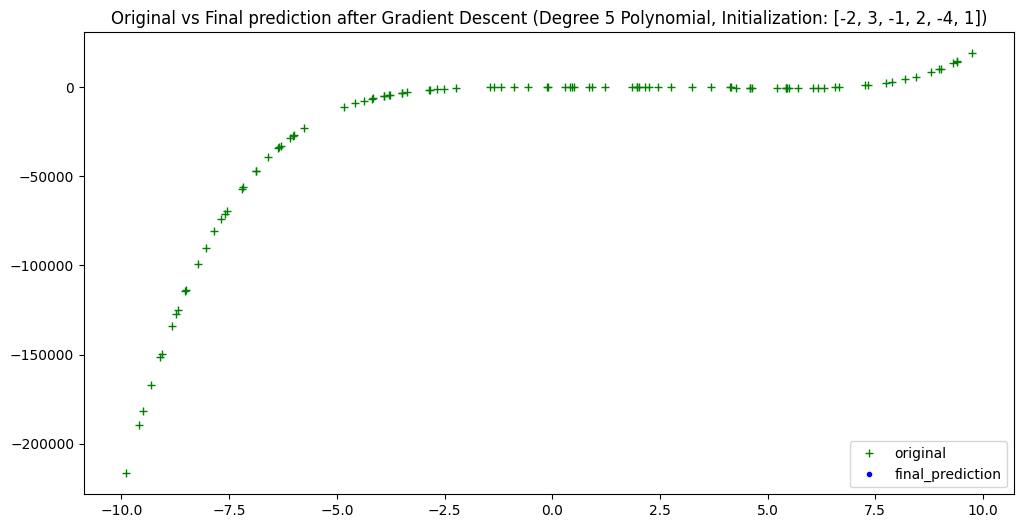

Final Coefficients predicted (Initialization: [-2, 3, -1, 2, -4, 1]): [nan, nan, nan, nan, nan, nan]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)


def eval_5th_degree(coeffs, x):
    result = 0
    for i in range(len(coeffs)):
        result += coeffs[i] * (x ** (len(coeffs) - 1 - i))
    return result

def gradient_descent(epochs, lr, init_coeffs, inputs_x, outputs_y):

    def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
        gradients = [0] * len(coeffs)

        y_bars = [eval_5th_degree(coeffs, x) for x in inputs_x]

        for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
            for i in range(len(coeffs)):
                partial_coeff = x ** (len(coeffs) - 1 - i)
                gradients[i] += (y_bar - y) * partial_coeff

        n = len(outputs_y)

        gradients = [(-2 / n) * grad for grad in gradients]

        return gradients

    coeffs_to_test = init_coeffs.copy()

    for epoch in range(epochs):
        gradients = calc_gradient_5th_poly(coeffs_to_test, inputs_x, outputs_y)

        for i in range(len(coeffs_to_test)):
            coeffs_to_test[i] -= lr * gradients[i]

    final_y_bar = [eval_5th_degree(coeffs_to_test, x) for x in inputs_x]

    outputs_y = np.array(outputs_y)
    final_y_bar = np.array(final_y_bar)

    final_loss = np.sum((outputs_y - final_y_bar) ** 2) / len(outputs_y)

    return final_loss, coeffs_to_test, final_y_bar

coeffs_degree_5 = [1, -10, 25, -20, 5, 0]

hundred_xs = np.random.uniform(-10, 10, 100)
ys_degree_5 = [eval_5th_degree(coeffs_degree_5, x) for x in hundred_xs]

plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, ys_degree_5, 'g+')
plt.title('Original data with degree 5 polynomial')
plt.show()

initializations = [
    [1, 0, 0, 0, 0, 0],
    [-2, 3, -1, 2, -4, 1]
]

for init_coeffs in initializations:
    GD_degree_5 = gradient_descent(30000, 0.0003, init_coeffs, hundred_xs, ys_degree_5)

    plt.figure(figsize=(12, 6))
    plt.plot(hundred_xs, ys_degree_5, 'g+', label='original')
    plt.plot(hundred_xs, GD_degree_5[2], 'b.', label='final_prediction')
    plt.title(f'Original vs Final prediction after Gradient Descent (Degree 5 Polynomial, Initialization: {init_coeffs})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Final Coefficients predicted (Initialization: {init_coeffs}): {GD_degree_5[1]}")


**4.Can you modify the algorithm to find a maxima of a function, instead of a minima?**

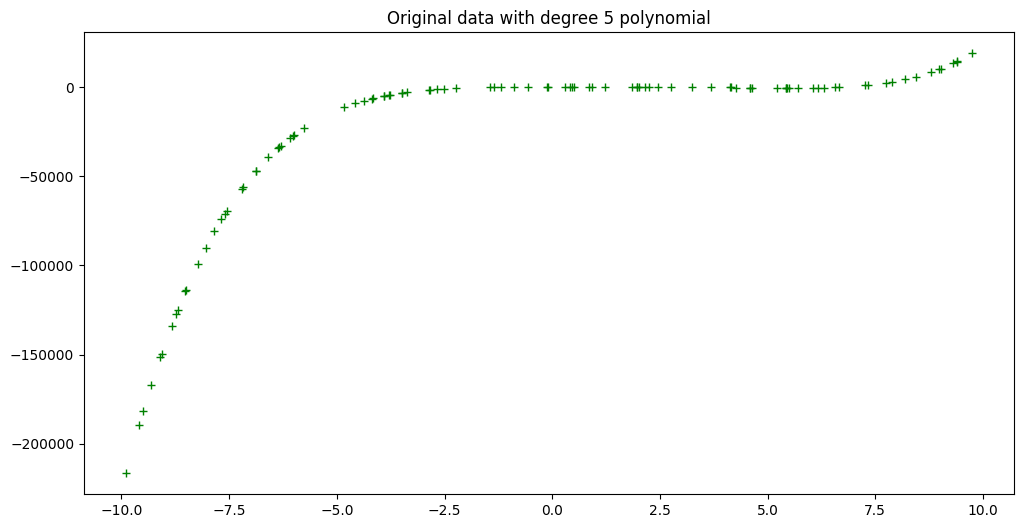

<ipython-input-24-96efd20517ab>:24: RuntimeWarning: overflow encountered in double_scalars
  gradients[i] += (y - y_bar) * partial_coeff
<ipython-input-24-96efd20517ab>:24: RuntimeWarning: invalid value encountered in double_scalars
  gradients[i] += (y - y_bar) * partial_coeff
<ipython-input-24-96efd20517ab>:38: RuntimeWarning: invalid value encountered in double_scalars
  coeffs_to_test[i] += lr * gradients[i]


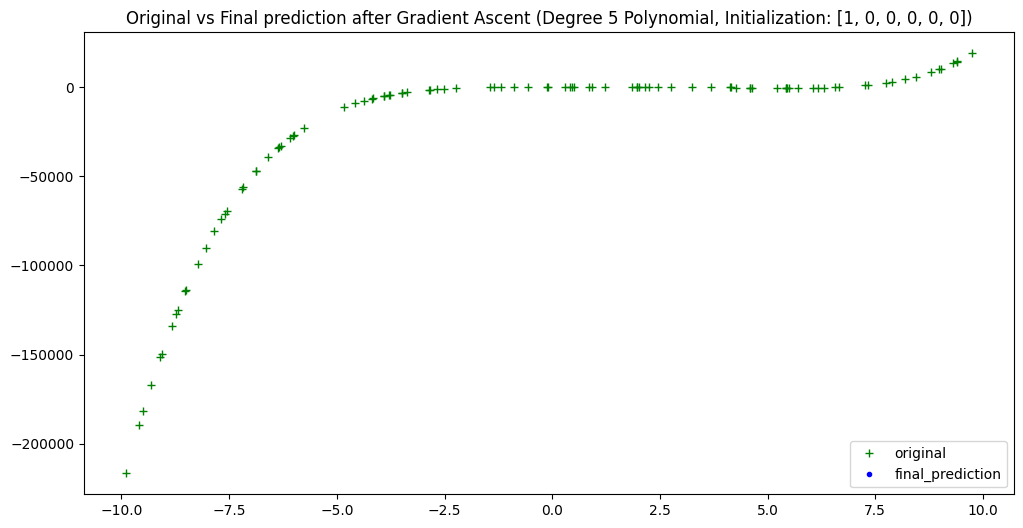

Final Coefficients predicted (Initialization: [1, 0, 0, 0, 0, 0]): [nan, nan, nan, nan, nan, nan]


<ipython-input-24-96efd20517ab>:11: RuntimeWarning: invalid value encountered in double_scalars
  result += coeffs[i] * (x ** (len(coeffs) - 1 - i))


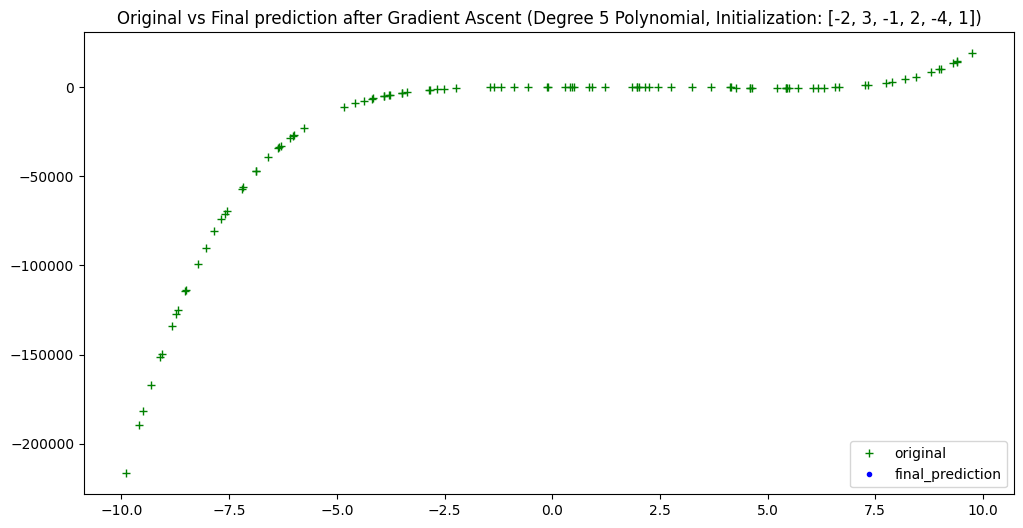

Final Coefficients predicted (Initialization: [-2, 3, -1, 2, -4, 1]): [nan, nan, nan, nan, nan, nan]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

def eval_5th_degree(coeffs, x):
    result = 0
    for i in range(len(coeffs)):
        result += coeffs[i] * (x ** (len(coeffs) - 1 - i))
    return result

def gradient_ascent(epochs, lr, init_coeffs, inputs_x, outputs_y):

    def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
        gradients = [0] * len(coeffs)

        y_bars = [eval_5th_degree(coeffs, x) for x in inputs_x]

        for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
            for i in range(len(coeffs)):
                partial_coeff = x ** (len(coeffs) - 1 - i)
                gradients[i] += (y - y_bar) * partial_coeff

        n = len(outputs_y)

        gradients = [(2 / n) * grad for grad in gradients]

        return gradients

    coeffs_to_test = init_coeffs.copy()

    for epoch in range(epochs):
        gradients = calc_gradient_5th_poly(coeffs_to_test, inputs_x, outputs_y)

        for i in range(len(coeffs_to_test)):
            coeffs_to_test[i] += lr * gradients[i]

    final_y_bar = [eval_5th_degree(coeffs_to_test, x) for x in inputs_x]

    outputs_y = np.array(outputs_y)
    final_y_bar = np.array(final_y_bar)

    final_loss = np.sum((outputs_y - final_y_bar) ** 2) / len(outputs_y)

    return final_loss, coeffs_to_test, final_y_bar

coeffs_degree_5 = [1, -10, 25, -20, 5, 0]

hundred_xs = np.random.uniform(-10, 10, 100)
ys_degree_5 = [eval_5th_degree(coeffs_degree_5, x) for x in hundred_xs]

plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, ys_degree_5, 'g+')
plt.title('Original data with degree 5 polynomial')
plt.show()

initializations = [
    [1, 0, 0, 0, 0, 0],  # Example initialization 1
    [-2, 3, -1, 2, -4, 1]  # Example initialization 2
    # Add more initializations as needed
]

for init_coeffs in initializations:
    GA_degree_5 = gradient_ascent(30000, 0.0003, init_coeffs, hundred_xs, ys_degree_5)

    plt.figure(figsize=(12, 6))
    plt.plot(hundred_xs, ys_degree_5, 'g+', label='original')
    plt.plot(hundred_xs, GA_degree_5[2], 'b.', label='final_prediction')
    plt.title(f'Original vs Final prediction after Gradient Ascent (Degree 5 Polynomial, Initialization: {init_coeffs})')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Final Coefficients predicted (Initialization: {init_coeffs}): {GA_degree_5[1]}")
